In [1]:
%reset -f


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import multivariate_normal

In [3]:
import scipy.io
mat = scipy.io.loadmat('TrainDATAtoyGaussian1D.mat')


x1=mat['NTrain']
x2=mat['PTrain']

In [4]:
#x1=2*np.random.randn(75)+2
#x2=.75*np.random.randn(25)+8


c:\users\daliriyan\appdata\local\programs\python\python35\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


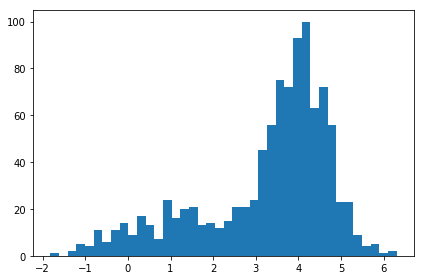

In [5]:
x=np.concatenate((x2,x1),axis=None)
#random.shuffle(x)
n_bins=40
fig, axs = plt.subplots(tight_layout=True)
hist=axs.hist(x, bins=n_bins)


In [6]:
mu_initial=np.array([0,3])
var_initial=np.array([.5,1])
pi_initial=np.array([.5,.5])
epsilon=0.01
Q_func_new=1
Q_func=0
C=2
counter=0;


In [7]:
r =x.shape
n=r
d=1
n


(1000,)

In [8]:
while (Q_func_new- Q_func)>epsilon:
    a_ij=np.zeros((1000,2))
    h_ij=np.zeros((1000,2))
    a_ij[:,0]=multivariate_normal.pdf(x,mu_initial[0],var_initial[0])
    a_ij[:,1]=multivariate_normal.pdf(x,mu_initial[1],var_initial[1])
    h_ij[:,0]=(a_ij[:,0]*pi_initial[0])/np.matmul(a_ij,pi_initial)
    h_ij[:,1]=(a_ij[:,1]*pi_initial[1])/np.matmul(a_ij,pi_initial)
    
    log_normal=np.zeros((1000,2))
    log_normal[:,0]=np.log(multivariate_normal.pdf(x,mu_initial[0],var_initial[0])*pi_initial[0])
    log_normal[:,1]=np.log(multivariate_normal.pdf(x,mu_initial[1],var_initial[1])*pi_initial[1])
    Q_func=np.dot(h_ij[:,0].T,log_normal[:,0])+np.dot(h_ij[:,1].T,log_normal[:,1])
   
    
    pi_initial=sum(h_ij)/n
    mu_initial=np.dot(h_ij.T,x)/sum(h_ij)
    s1=(x-mu_initial[0])**2
    s2=(x-mu_initial[1])**2
    var_initial=[np.dot(h_ij[:,0],s1)/sum(h_ij[:,0]),np.dot(h_ij[:,1],s2)/sum(h_ij[:,1])]
    var_initial
    
    log_normal=np.zeros((1000,2))
    log_normal[:,0]=np.log(multivariate_normal.pdf(x,mu_initial[0],var_initial[0])*pi_initial[0])
    log_normal[:,1]=np.log(multivariate_normal.pdf(x,mu_initial[1],var_initial[1])*pi_initial[1])
    Q_func_new=np.dot(h_ij[:,0].T,log_normal[:,0])+np.dot(h_ij[:,1].T,log_normal[:,1])
    print(Q_func_new- Q_func)

    

552.3692254973253
8.596871631333215
6.88357179321406
4.711004377031713
2.891790515519233
1.7123852432218882
1.0248904306661188
0.6310936801812659
0.40108342553139664
0.26249888227380325
0.17625207230980777
0.12094543195985352
0.08452953711889677
0.059997265220317786
0.04314291237619727
0.031367094377174
0.02302009176264619
0.01702983848781514
0.012684879578728214
0.009504220995495416


In [9]:
pi_initial

array([0.25299737, 0.74700263])

In [10]:
a_ij=np.zeros((1000,2))
a_ij[:,0]=multivariate_normal.pdf(x,mu_initial[0],var_initial[0])
a_ij[:,1]=multivariate_normal.pdf(x,mu_initial[1],var_initial[1])
h_ij[:,0]=(a_ij[:,0]*pi_initial[0])/np.matmul(a_ij,pi_initial)
h_ij[:,1]=(a_ij[:,1]*pi_initial[1])/np.matmul(a_ij,pi_initial)
sum(sum(h_ij))



999.9999999999982

In [11]:
log_normal=np.zeros((1000,2))
log_normal[:,0]=np.log(multivariate_normal.pdf(x,mu_initial[0],var_initial[0])*pi_initial[0])
log_normal[:,1]=np.log(multivariate_normal.pdf(x,mu_initial[1],var_initial[1])*pi_initial[1])
Q_func=np.dot(h_ij[:,0].T,log_normal[:,0])+np.dot(h_ij[:,1].T,log_normal[:,1])
Q_func


-1739.519278223591

In [12]:
pi_initial=sum(h_ij)/n
mu_initial=np.dot(h_ij.T,x)/sum(h_ij)

var_initial

[1.283622138516594, 0.4755340756264432]

In [13]:
#
#x_mu0=np.dot(h_ij[0].T,(x-mu_initial[0])**2)
s1=(x-mu_initial[0])**2
s1=(x-mu_initial[1])**2
var_initial=[np.dot(h_ij[:,0],s1)/sum(h_ij[:,0]),np.dot(h_ij[:,1],s2)/sum(h_ij[:,1])]
var_initial

[10.270989634366064, 0.4745794649970696]

In [14]:
log_normal=np.zeros((1000,2))
log_normal[:,0]=np.log(multivariate_normal.pdf(x,mu_initial[0],var_initial[0])*pi_initial[0])
log_normal[:,1]=np.log(multivariate_normal.pdf(x,mu_initial[1],var_initial[1])*pi_initial[1])
Q_func_new=np.dot(h_ij[:,0].T,log_normal[:,0])+np.dot(h_ij[:,1].T,log_normal[:,1])
Q_func_new


-1891.6504524936713

In [15]:
Q_func_new-Q_func

-152.13117427008024

In [16]:
j=10
while j>5:
    print(j)
    j=j-1
    

10
9
8
7
6


In [17]:
sum(a_ij)

array([ 79.53671589, 312.17746503])

In [18]:
a=np.array([2,4])
b=np.array([10,100])
a/b

array([0.2 , 0.04])

In [19]:
pi_initial

array([0.25365325, 0.74634675])